In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(12345)
x1 = np.random.normal(0, 1, 100)+2
y1 = np.random.normal(0, 1, 100)

x2 = np.random.normal(0, 1, 100)-2
y2 = np.random.normal(0, 1, 100)

x3 = np.random.normal(0, 1, 10)*10
y3 = np.random.normal(0, 1, 10)*10

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

data = np.stack((x, y), axis=1)

df = pd.DataFrame(data=data, columns=['x', 'y'])
df

,x,y
0,1.795292,-1.565657
1,2.478943,-0.562540
2,1.480561,-0.032664
3,1.444270,-0.929006
4,3.965781,-0.482573
...,...,...
205,5.661055,-8.987552
206,4.564874,-13.666324
207,1.947881,4.514017
208,-6.550538,-15.872218


<AxesSubplot:xlabel='x', ylabel='y'>

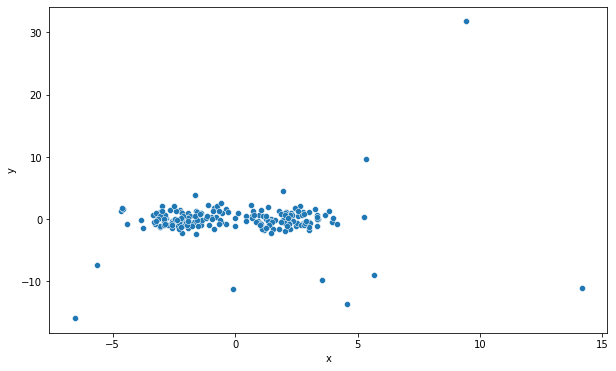

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y')
# 这里可以看出来有两个明显的类

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(data)
cls = kmeans.predict(data)

In [5]:
df['cls'] = cls
df.cls.value_counts()

2     33
8     27
5     23
17    21
6     20
15    18
13    15
18    12
12    11
0     10
19    10
14     2
1      1
10     1
9      1
7      1
4      1
16     1
3      1
11     1
Name: cls, dtype: int64

In [6]:
def clus_summary(df):
    x_mean = df.x.mean()
    y_mean = df.y.mean()
    max_dist_from_seed = np.max(np.sqrt(np.square(df.x-x_mean)+np.square(df.y-y_mean)))
    return pd.Series(data=[x_mean, y_mean, max_dist_from_seed], index=['x_mean', 'y_mean', 'max_dist_from_seed'])
summary = df.groupby('cls').apply(clus_summary)

x_mean = df.x.mean()
y_mean = df.y.mean()
summary['dist_between_cls'] = np.sqrt(np.square(summary.x_mean-x_mean)+np.square(summary.y_mean-y_mean))

In [7]:
summary

,x_mean,y_mean,max_dist_from_seed,dist_between_cls
cls,,,,
0,-0.721001,-0.563889,1.026923,0.926739
1,9.415712,31.768731,0.000000,33.219362
2,2.455382,-0.558251,1.247093,2.407050
3,-6.550538,-15.872218,0.000000,17.099485
4,4.564874,-13.666324,0.000000,14.271534
5,-1.741138,0.645401,0.921176,1.982202
6,2.371436,1.103806,1.309899,2.586800
7,14.157532,-11.043763,0.000000,17.814420
8,-2.954208,-0.334688,1.524228,3.051716


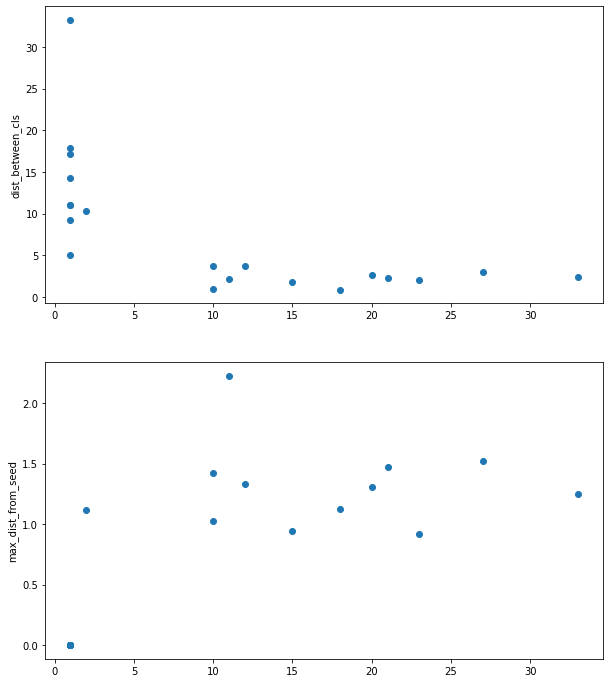

In [8]:
fig, ax = plt.subplots(2,1, figsize=(10, 12))
ax[0].scatter(df.cls.value_counts().sort_index().values, summary.dist_between_cls.values)
ax[0].set_ylabel('dist_between_cls')
ax[1].scatter(df.cls.value_counts().sort_index().values, summary.max_dist_from_seed.values)
ax[1].set_ylabel('max_dist_from_seed')
plt.show()

### 从图中看，是定大于5为异常点，还是大于3为异常点呢？